## Data Preprocessing Template

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the dataset

In [2]:
df_train = pd.read_csv('/home/tasnima/jupyter/Project Forecasting/demand-forecasting-kernels-only/train.csv')
df_test = pd.read_csv('/home/tasnima/jupyter/Project Forecasting/demand-forecasting-kernels-only/test.csv')

In [3]:
df_train.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df_test.head(5)

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
df_train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

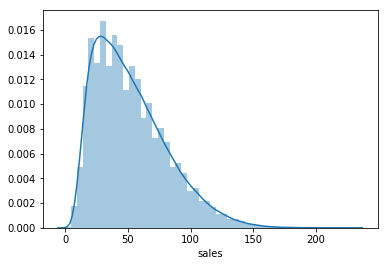

In [6]:
sns.distplot(df_train['sales'])

### import datetime class from datetime module

In [7]:
from datetime import datetime

### Create date object in given time format yyyy-mm-dd

In [8]:
df_train['date'] = pd.to_datetime(df_train['date'], infer_datetime_format=True)
df_test['date'] = pd.to_datetime(df_test['date'], infer_datetime_format=True)

df_train.set_index(pd.DatetimeIndex(df_train['date']), inplace=True)
df_test.set_index(pd.DatetimeIndex(df_test['date']), inplace=True)

df_train['date'] = df_train.set_index(df_train['date'], append = False)
df_train['date'] = df_train.index.to_julian_date()

df_test['date'] = df_test.set_index(df_test['date'], append = False)
df_test['date'] = df_test.index.to_julian_date()

In [9]:
X = df_train.iloc[:, :1].values
y = df_train.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

## Simple Linear Regression

### Fitting Simple Linear Regression to the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)

### Visualising the Training set results

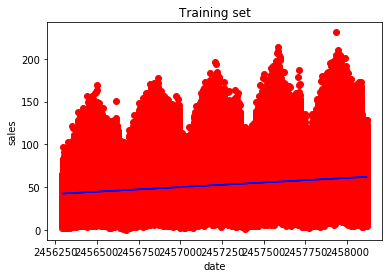

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Training set')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

In [15]:
test_data = df_test.iloc[:, 1:2].values
test_predict = regressor.predict(test_data)

In [16]:
submission = pd.DataFrame({'id': df_test['id'], 'sales': test_predict.astype(np.int32)})
submission.to_csv('submission.csv', index=False)